In [103]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

In [104]:
# 读取CSV文件
df = pd.read_csv('fdcl/fdcljc.csv')  # 替换为你的CSV文件路径

# 将日期和时间列合并为一个datetime类型的列
df['日期时间'] = pd.to_datetime(df['日期'].astype(str) + ' ' + df['时间'])

df.head()

,日期,时间,发电类型,发电出力值,负荷率,受阻率,厂用率,日期时间
0,20231028,15:30,光伏,1063.2375,0.0,0.0,0.8523,2023-10-28 15:30:00
1,20231028,15:30,火电燃煤,11417.4727,0.0,0.0,10.0141,2023-10-28 15:30:00
2,20231028,15:30,水电有功,460.5616,0.0,0.0,1.0456,2023-10-28 15:30:00
3,20231028,15:30,发电有功,15180.0322,0.0,0.0,0.0000,2023-10-28 15:30:00
4,20231028,15:30,风电,878.1815,0.0,0.0,6.0089,2023-10-28 15:30:00


In [188]:
df_fdyg = df[df['发电类型'] == '发电有功']

df_gf = df[df['发电类型'] == '光伏']
df_hdrm = df[df['发电类型'] == '火电燃煤']
df_sdyg = df[df['发电类型'] == '水电有功']
df_fd = df[df['发电类型'] == '风电']

df_hdswz = df[df['发电类型'] == '火电生物质']

In [200]:
# 将每个数据集保存到单独的CSV文件中
df_fdyg.to_csv('fdcl/split/df_fdyg.csv', index=False)
df_gf.to_csv('fdcl/split/df_gf.csv', index=False)
df_hdrm.to_csv('fdcl/split/df_hdrm.csv', index=False)
df_sdyg.to_csv('fdcl/split/df_sdyg.csv', index=False)
df_fd.to_csv('fdcl/split/df_fd.csv', index=False)
df_hdswz.to_csv('fdcl/split/df_hdswz.csv', index=False)


In [255]:
# 预览数据集
dfshow = df_fd
dfshow

,日期,时间,发电类型,发电出力值,负荷率,受阻率,厂用率,日期时间
4,20231028,15:30,风电,878.1815,0.00,0.0,6.0089,2023-10-28 15:30:00
6,20231028,15:45,风电,908.1126,0.00,0.0,5.1185,2023-10-28 15:45:00
15,20231028,16:00,风电,996.0299,0.00,0.0,5.0989,2023-10-28 16:00:00
23,20231028,16:15,风电,1075.9265,0.00,0.0,4.8550,2023-10-28 16:15:00
28,20231028,16:30,风电,1222.3649,0.00,0.0,5.2008,2023-10-28 16:30:00
...,...,...,...,...,...,...,...,...
38002,20240103,07:30,风电,924.6199,11.87,0.0,3.9189,2024-01-03 07:30:00
38007,20240103,07:45,风电,908.7917,11.69,0.0,3.5831,2024-01-03 07:45:00
38014,20240103,08:00,风电,895.0253,11.51,0.0,2.7418,2024-01-03 08:00:00
38023,20240103,08:15,风电,896.6438,11.52,0.0,3.4482,2024-01-03 08:15:00


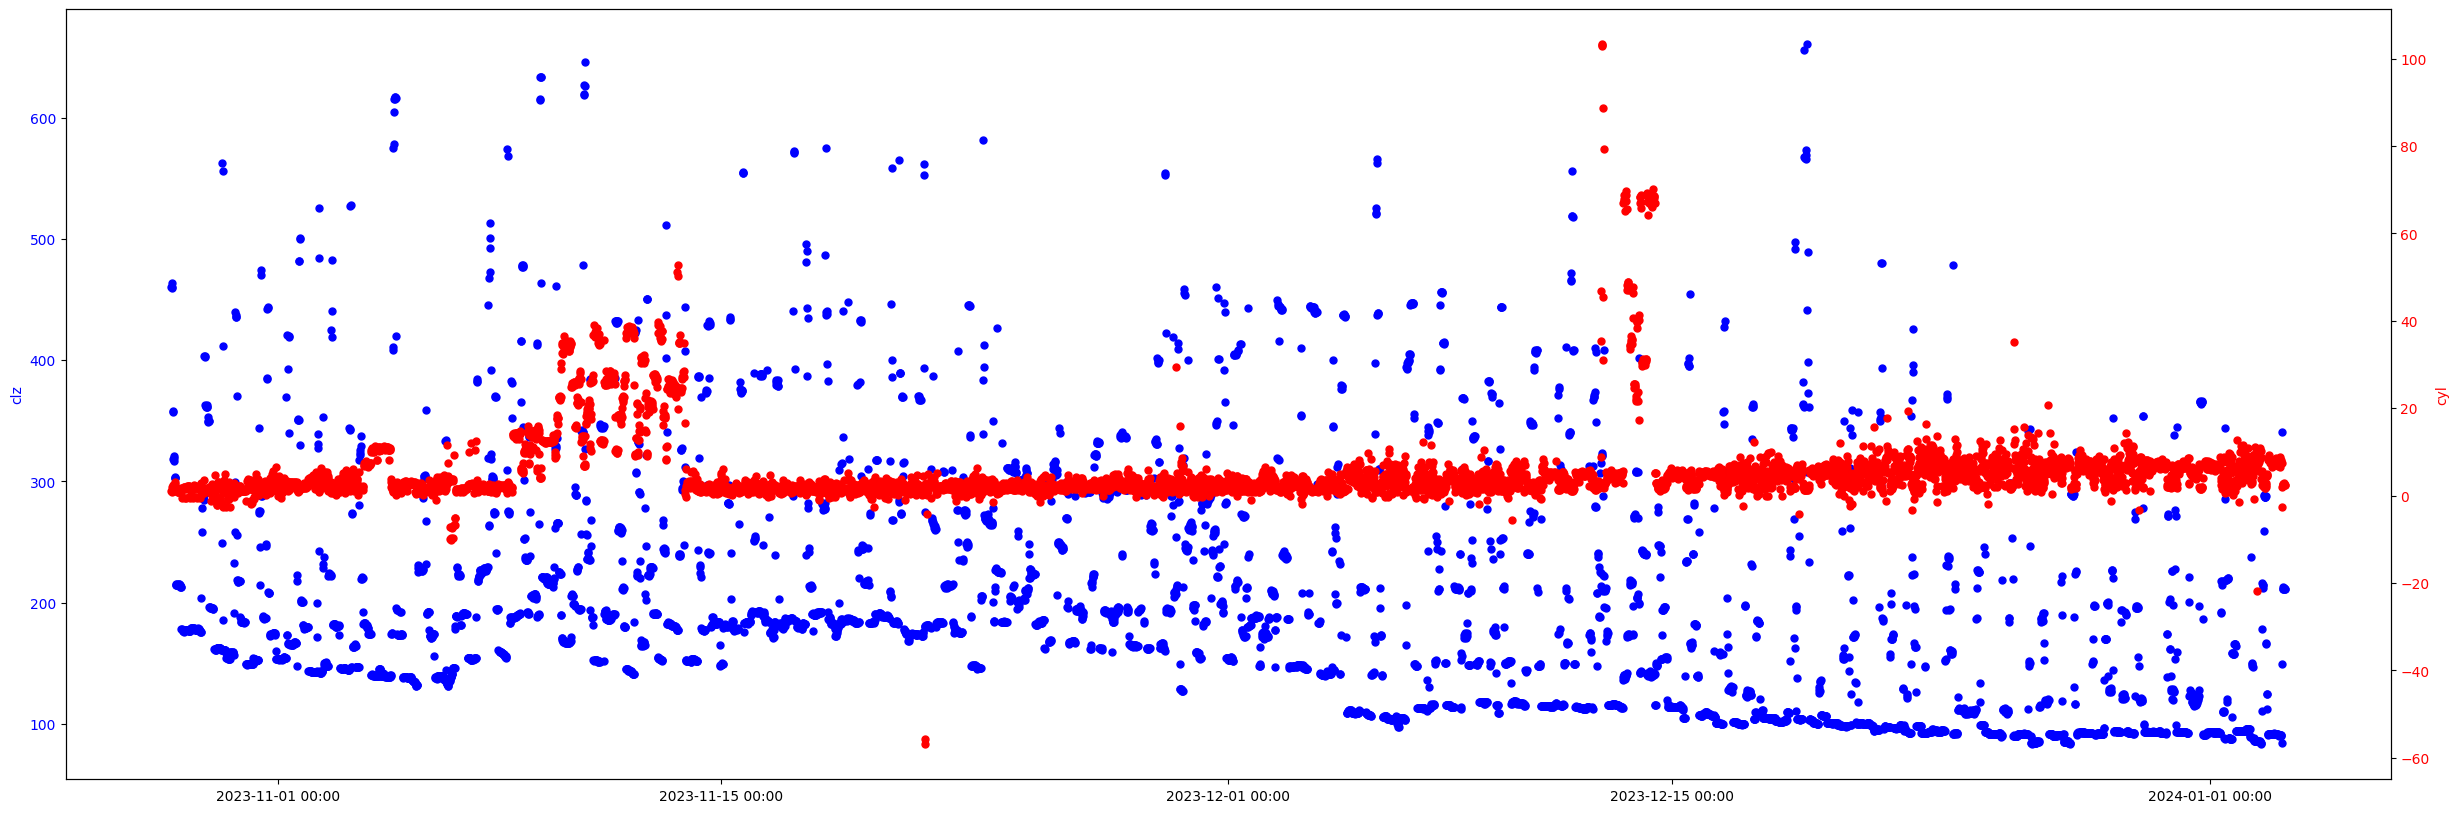

In [243]:
# 绘图
fig, ax1 = plt.subplots(figsize=(30, 10))
# 绘制发电出力值的散点图
ax1.scatter(dfshow['日期时间'], dfshow['发电出力值'], color='blue', label='clz', s=25)
ax1.set_ylabel('clz', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
# 创建第二个y轴
ax2 = ax1.twinx()  
ax2.scatter(dfshow['日期时间'], dfshow['厂用率'], color='red', label='cyl', s=25)
# 设置第二个y轴的标签
ax2.set_ylabel('cyl', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# 设置x轴时间标签纵向显示
plt.xticks(rotation=90)
# 设置x轴日期格式，只显示日期到小时
date_form = DateFormatter('%Y-%m-%d %H:%M')
ax1.xaxis.set_major_formatter(date_form)

# 显示图表
plt.show()

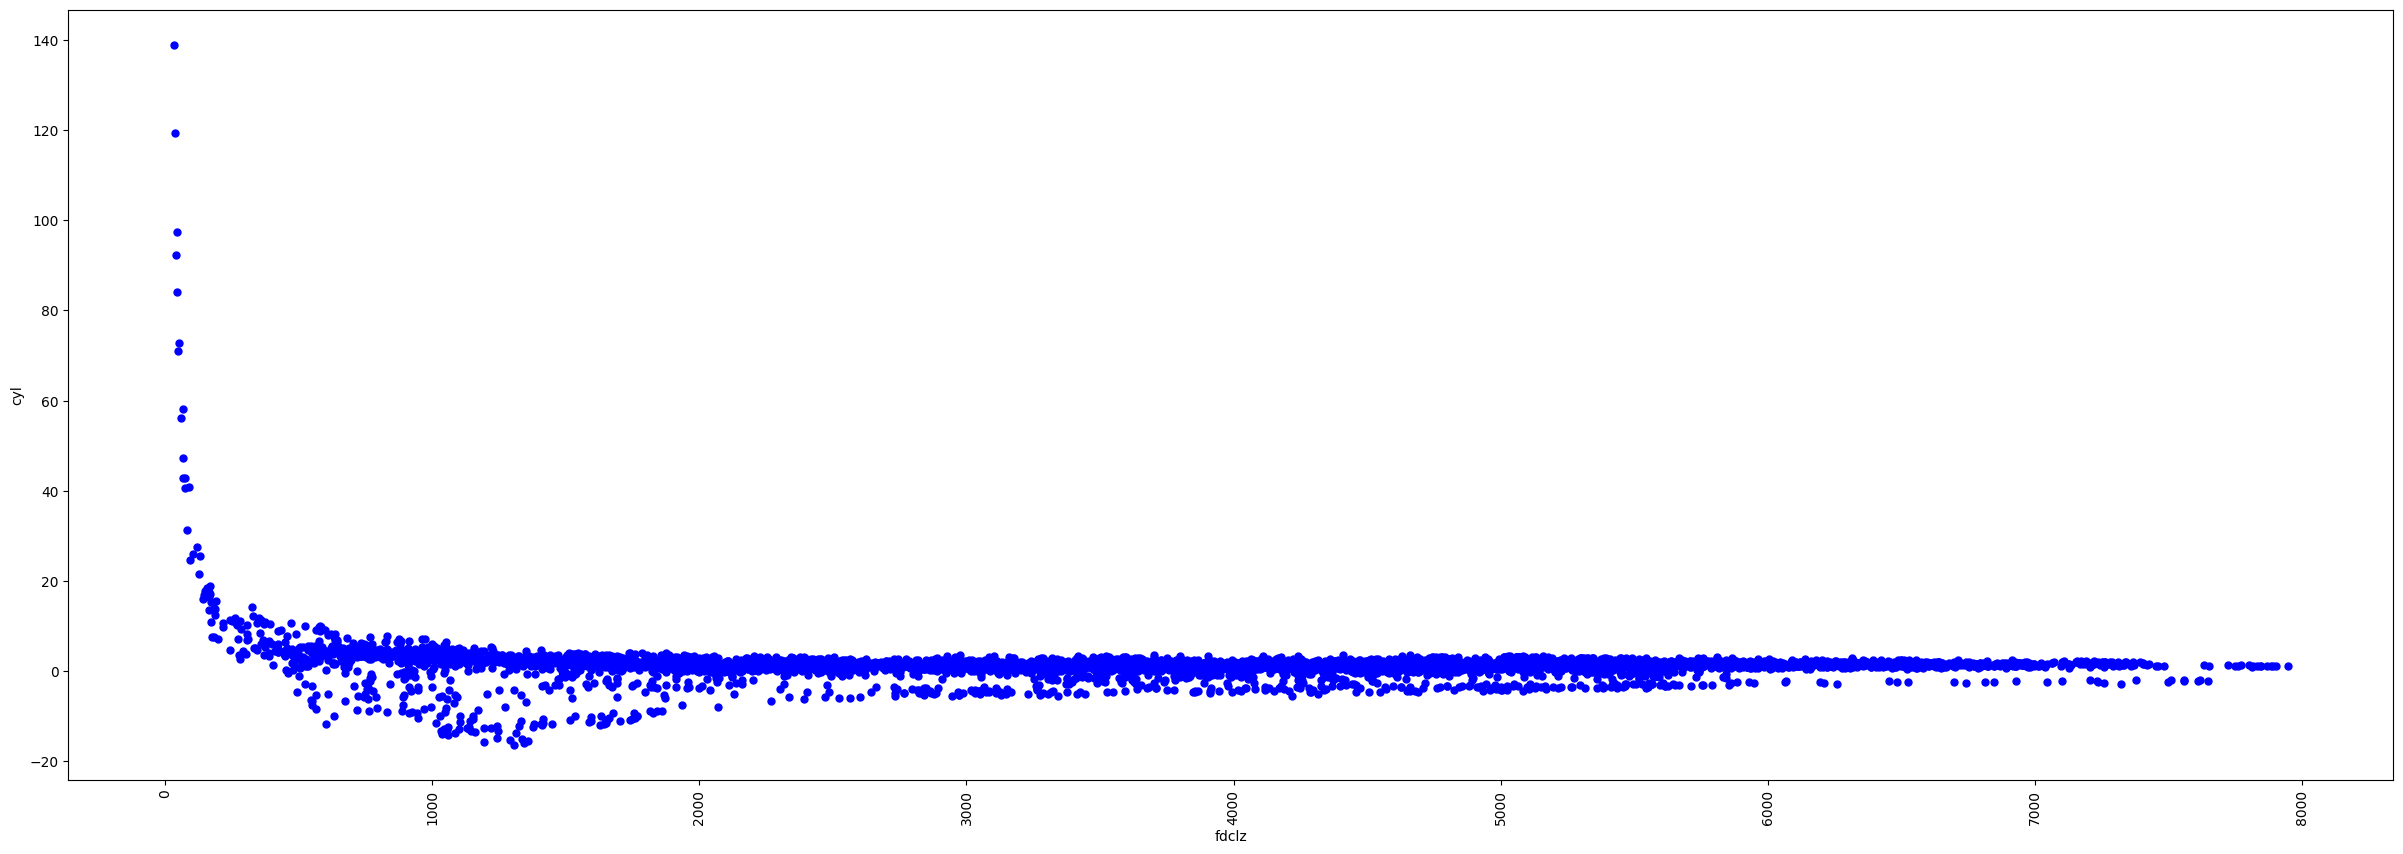

In [257]:
# 绘图
fig, ax1 = plt.subplots(figsize=(30, 10))

# 绘制发电出力值的散点图
ax1.scatter(dfshow['发电出力值'],dfshow['厂用率'], color='blue', label='fdcl', s=25)
ax1.set_ylabel('cyl')
ax1.set_xlabel('fdclz')
ax1.tick_params(axis='y')

# 设置x轴时间标签纵向显示
plt.xticks(rotation=90)

# 显示图表
plt.show()


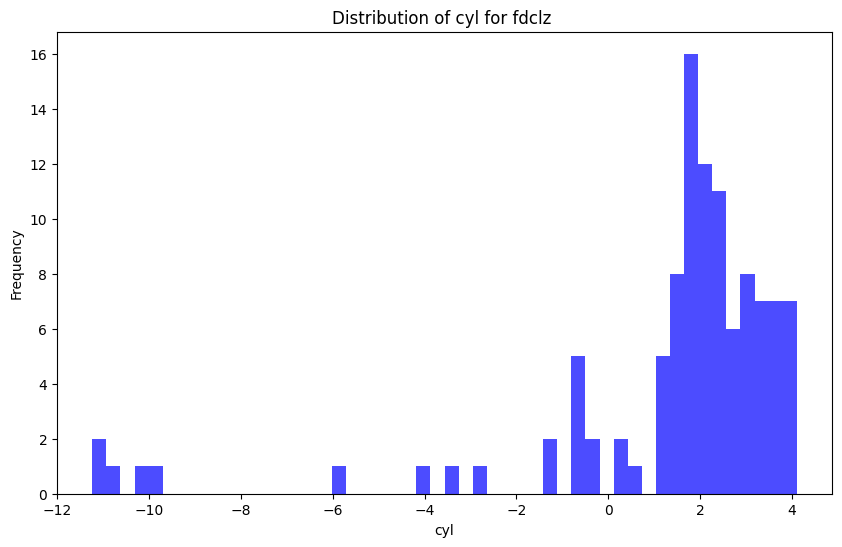

In [260]:
# 发电出力值在范围内的数据
df_selected = dfshow[(dfshow['发电出力值'] >= 1500) & (dfshow['发电出力值'] <= 1600)]

# 绘制 '厂用率' 的直方图
plt.figure(figsize=(10, 6))
plt.hist(df_selected['厂用率'], bins=50, color='blue', alpha=0.7)
plt.xlabel('cyl')
plt.ylabel('Frequency')
plt.title(f'Distribution of cyl for fdclz ')
plt.show()

